<a href="https://colab.research.google.com/github/chiragpipalia/CreditRiskModel/blob/main/Loan_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pylab as pl

In [4]:
df = pd.read_csv('/content/drive/My Drive/Data/loan_data_2007_2014.csv')
df.head()

<ipython-input-4-a6bbf6b085ad>:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/Data/loan_data_2007_2014.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [6]:
df.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [7]:
target_0s = ['Default', 'Charged Off', 'Late (31-120 days)', 'Does not meet the credit policy. Status:Charged Off']
df['target'] = 0
df.loc[df.loan_status.isin(target_0s), 'target'] = 1

In [8]:
df.target.value_counts(normalize = True)

0    0.890693
1    0.109307
Name: target, dtype: float64

In [9]:
missing_values = df.isna().mean()

In [10]:
missing_values[missing_values > 0.8].count(), missing_values[missing_values > 0.8].count()

(18, 18)

In [11]:
df = df.dropna(axis=1, thresh=(1-0.8)*len(df))

In [12]:
df.dtypes

id                               int64
member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

In [13]:
df.term.value_counts()[:5]

 36 months    337953
 60 months    128332
Name: term, dtype: int64

In [14]:
object_columns = df.select_dtypes(include='object').columns

In [15]:
for i, col in enumerate(object_columns):
  print(f'{i} Column: {col}')
  print(df[col].value_counts()[:5])
  print("--"*22)
  print()


0 Column: term
 36 months    337953
 60 months    128332
Name: term, dtype: int64
--------------------------------------------

1 Column: grade
B    136929
C    125293
D     76888
A     74867
E     35757
Name: grade, dtype: int64
--------------------------------------------

2 Column: sub_grade
B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
Name: sub_grade, dtype: int64
--------------------------------------------

3 Column: emp_title
Teacher             5399
Manager             4438
Registered Nurse    2316
RN                  2204
Supervisor          1967
Name: emp_title, dtype: int64
--------------------------------------------

4 Column: emp_length
10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
Name: emp_length, dtype: int64
--------------------------------------------

5 Column: home_ownership
MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
Name: home_ownership, dtype: 

In [16]:
drop_columns = ['url', 'application_type', 'desc', 'pymnt_plan', 'loan_status']
date_columms = ['earliest_cr_line', 'issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
process_columns = ['emp_length', 'term']
cat_columns = ['grade', 'sub_grade', 'emp_title', 'home_ownership','verification_status', 'purpose', 'title', 'zip_code', 'addr_state', 'initial_list_status']

In [17]:
len(drop_columns) + len(date_columms) + len(process_columns) + len(cat_columns)

22

Checking for sanity all columns with data type object are accounted for.

In [18]:
#pd.get_dummies(df[cat_columns])

In [19]:
df.drop(columns = drop_columns, inplace = True)
#process_columns

In [20]:
df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [28]:
df['emp_length'] = df['emp_length'].str.extract('(\d+)', expand=False).fillna(0).astype(int)


In [29]:
print(df.term.unique())
df['term'] = df['term'].str.extract('(\d+)', expand=False).fillna(0).astype(int)

[' 36 months' ' 60 months']


In [ ]:
date_columms = ['earliest_cr_line', 'issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']


In [45]:
## takes pandas series as input and returns months since the date.
def convert_datetime_columns(datetime_col):
   return (datetime.datetime(2023, 1, 1) - (pd.to_datetime(datetime_col, format = "%b-%y")))/np.timedelta64(1, 'M')

In [47]:
for col in date_columms:
  diff = convert_datetime_columns(df[col])
  df[f'months_since_{col}'] = diff

In [48]:
## dropping original date columns as we now have months since for those columns
df.drop(columns = date_columms, inplace = True)

## Handling Object columns.
We have taken care of drop, date and process columns, only remaining is category columns

In [51]:
for i, col in enumerate(cat_columns):
  print(f"{col} : {df[col].nunique()}")

grade : 7
sub_grade : 35
emp_title : 205475
home_ownership : 6
verification_status : 3
purpose : 14
title : 63098
zip_code : 888
addr_state : 50
initial_list_status : 2


Checking which columns to avoid converting into dummy variables (columns with high number of unique values).
we can skip converting emp_title, title and may be zip code to convert into dummy variables

In [54]:
## lets drop emp_title and title columns and converting rest to dummy variables

In [55]:
df.drop(columns = ['emp_title', 'title'], inplace = True)

In [56]:
cat_columns.remove('emp_title')
cat_columns.remove('title')
cat_columns

['grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'zip_code',
 'addr_state',
 'initial_list_status']

In [57]:
# function to create dummy variables
def get_dummy_df(df, columns_list):
    df_dummies = []
    for col in columns_list:
        df_dummies.append(pd.get_dummies(df[col], prefix = col))
    df_dummies = pd.concat(df_dummies, axis = 1)

    return df_dummies

In [58]:
df_dummies = get_dummy_df(df, cat_columns)

In [60]:
df = pd.concat([df, df_dummies], axis = 1)

In [61]:
df.dtypes

id                         int64
member_id                  int64
loan_amnt                  int64
funded_amnt                int64
funded_amnt_inv          float64
                          ...   
addr_state_WI              uint8
addr_state_WV              uint8
addr_state_WY              uint8
initial_list_status_f      uint8
initial_list_status_w      uint8
Length: 1055, dtype: object

In [62]:
df.drop(columns = ['member_id', 'id'], inplace = True)

In [77]:
df.drop(columns = cat_columns, inplace = True)

In [78]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

not_numeric_columns = []
for col in df.columns:
  if not is_numeric_dtype(df[col]):
    not_numeric_columns.append(col)
not_numeric_columns

[]

## Missing values

In [86]:
columns_missing_vals = df.columns[df.isna().any()].to_list()
columns_missing_vals

['annual_inc',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'months_since_earliest_cr_line',
 'months_since_last_pymnt_d',
 'months_since_next_pymnt_d',
 'months_since_last_credit_pull_d']

In [88]:
df[columns_missing_vals].isna().mean()

annual_inc                         0.000009
delinq_2yrs                        0.000062
inq_last_6mths                     0.000062
mths_since_last_delinq             0.536906
open_acc                           0.000062
pub_rec                            0.000062
revol_util                         0.000729
total_acc                          0.000062
collections_12_mths_ex_med         0.000311
mths_since_last_major_derog        0.787739
acc_now_delinq                     0.000062
tot_coll_amt                       0.150715
tot_cur_bal                        0.150715
total_rev_hi_lim                   0.150715
months_since_earliest_cr_line      0.000062
months_since_last_pymnt_d          0.000806
months_since_next_pymnt_d          0.487286
months_since_last_credit_pull_d    0.000090
dtype: float64

In [94]:
fill_with_zero_cols = ['delinq_2yrs', 'mths_since_last_delinq']

In [97]:
for col in columns_missing_vals:
  missing_perc = df[col].isna().mean()
  if missing_perc >= 0.7:
    df.drop(col, inplace = True)
  elif col in fill_with_zero_cols:
    df.fillna(0, inplace = True)
  else:
    df.fillna(df[col].mean(), inplace= True)


In [98]:
columns_missing_vals = df.columns[df.isna().any()].to_list()
columns_missing_vals

[]

Data seems ready for the model.

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc, classification_report
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier
import xgboost

In [67]:
df.target.value_counts(normalize=True)

0    0.890693
1    0.109307
Name: target, dtype: float64

In [99]:
X = df.drop(columns = 'target')
y = df['target']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [101]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"AUC Score: {roc_auc_score(y_test, y_pred)}")

AUC Score: 0.9692256768499325


AUC of 0.96 is very good.

In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    124504
           1       1.00      0.94      0.97     15382

    accuracy                           0.99    139886
   macro avg       1.00      0.97      0.98    139886
weighted avg       0.99      0.99      0.99    139886



In [104]:
feature_importance_dict = dict(zip(X.columns, clf.feature_importances_))
sorted_dict = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

print(sorted_dict)

{'recoveries': 0.11814915427086926, 'collection_recovery_fee': 0.10481943110582283, 'total_rec_prncp': 0.10193375982493552, 'months_since_last_pymnt_d': 0.09357950580996491, 'last_pymnt_amnt': 0.0692561420465745, 'total_pymnt_inv': 0.056214083706299794, 'total_pymnt': 0.05559463125037658, 'out_prncp_inv': 0.0314647076677518, 'funded_amnt_inv': 0.028752056467908748, 'out_prncp': 0.027528524535391133, 'months_since_next_pymnt_d': 0.025368181579072505, 'funded_amnt': 0.02455440371905491, 'installment': 0.02423101209527506, 'loan_amnt': 0.019640979245313855, 'total_rec_int': 0.01623949119726925, 'months_since_last_credit_pull_d': 0.013724655455478001, 'months_since_issue_d': 0.013604369337654345, 'int_rate': 0.010377665593933123, 'total_rec_late_fee': 0.00916631349075067, 'total_rev_hi_lim': 0.007098367478253503, 'dti': 0.006710487035331056, 'tot_cur_bal': 0.006612520313942083, 'revol_bal': 0.006455410937909969, 'annual_inc': 0.006293467797800219, 'revol_util': 0.006042540442754682, 'term'

In [107]:
X.shape[1]

1044

We have 1044 features right now,

In [121]:
import itertools

top500 = dict(itertools.islice(sorted_dict.items(), 500)).keys()
top500 = list(top500)

In [122]:
X = X[top500].copy()

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [124]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"AUC Score: {roc_auc_score(y_test, y_pred)}")

AUC Score: 0.9726062515476309


## with top 500 variables our AUC increased to 0.9726

In [125]:
feature_importance_dict = dict(zip(X.columns, clf.feature_importances_))
sorted_dict = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

print(sorted_dict)

{'recoveries': 0.1413931560573262, 'collection_recovery_fee': 0.1114546833490905, 'total_rec_prncp': 0.09992550306140048, 'months_since_last_pymnt_d': 0.097855392887288, 'last_pymnt_amnt': 0.06483729995187924, 'total_pymnt_inv': 0.060591894315308883, 'total_pymnt': 0.054116552449031435, 'loan_amnt': 0.029286206159448994, 'out_prncp_inv': 0.027538484823452378, 'funded_amnt_inv': 0.02689052428893, 'months_since_next_pymnt_d': 0.026779497075784465, 'installment': 0.024960999767007542, 'out_prncp': 0.024959252621603742, 'funded_amnt': 0.022672679661775774, 'months_since_issue_d': 0.016858550983404077, 'total_rec_int': 0.014587328809086652, 'months_since_last_credit_pull_d': 0.01421687063454782, 'int_rate': 0.009285907192661655, 'total_rec_late_fee': 0.009260265799140554, 'revol_bal': 0.005542318403973263, 'dti': 0.005462067720637708, 'term': 0.0052287059534574, 'total_rev_hi_lim': 0.0051463458506732195, 'annual_inc': 0.005127687650552345, 'tot_cur_bal': 0.005084025055892004, 'revol_util': 

In [126]:
top300 = dict(itertools.islice(sorted_dict.items(), 300)).keys()
top300 = list(top300)

In [127]:
X = X[top300].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [128]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"AUC Score: {roc_auc_score(y_test, y_pred)}")

AUC Score: 0.9743290444224197


### By top 300 AUC increased to 0.9743

### top 100 features

In [134]:
feature_importance_dict = dict(zip(X.columns, clf.feature_importances_))
sorted_dict = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

print(sorted_dict)

top100 = dict(itertools.islice(sorted_dict.items(), 100)).keys()
top100 = list(top100)

{'recoveries': 0.14722413202517692, 'collection_recovery_fee': 0.11419964658252846, 'months_since_last_pymnt_d': 0.11084019380655474, 'total_rec_prncp': 0.10032711739984274, 'last_pymnt_amnt': 0.06615180589627502, 'total_pymnt': 0.057445547762080315, 'total_pymnt_inv': 0.05227792832578451, 'out_prncp': 0.0311728303373037, 'loan_amnt': 0.02799435311852843, 'months_since_next_pymnt_d': 0.026783950398657694, 'out_prncp_inv': 0.0256054556732487, 'funded_amnt_inv': 0.02559683392592873, 'funded_amnt': 0.02494646600127769, 'installment': 0.023699325994039306, 'months_since_last_credit_pull_d': 0.0167634118195636, 'total_rec_int': 0.014731506087939618, 'months_since_issue_d': 0.013682836783549045, 'total_rec_late_fee': 0.010249316690268654, 'int_rate': 0.008787090884928784, 'total_rev_hi_lim': 0.0064107614925733155, 'tot_cur_bal': 0.00488999073148316, 'dti': 0.004831780456702298, 'annual_inc': 0.004822304866810173, 'revol_bal': 0.004773368734742654, 'term': 0.004399682225426043, 'revol_util': 

In [135]:
X = X[top100].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [136]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"AUC Score: {roc_auc_score(y_test, y_pred)}")

AUC Score: 0.9780346743795124


### AUC Score increased to 0.9780

### Top 75 Variables

In [137]:
feature_importance_dict = dict(zip(X.columns, clf.feature_importances_))
sorted_dict = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

print(sorted_dict)

top75 = dict(itertools.islice(sorted_dict.items(), 75)).keys()
top75 = list(top75)

{'recoveries': 0.15071749272878038, 'collection_recovery_fee': 0.1417047473524684, 'months_since_last_pymnt_d': 0.11501407084987823, 'total_rec_prncp': 0.10685357575651545, 'last_pymnt_amnt': 0.06951870536185883, 'total_pymnt': 0.05024036024426286, 'total_pymnt_inv': 0.04624981982175948, 'funded_amnt_inv': 0.03213569341257466, 'installment': 0.031119639989687305, 'loan_amnt': 0.030190367874556995, 'funded_amnt': 0.027757997631861563, 'out_prncp': 0.026883306251470073, 'months_since_next_pymnt_d': 0.02426540000290303, 'out_prncp_inv': 0.022971454387269333, 'total_rec_int': 0.015893450976040033, 'months_since_issue_d': 0.015819843644348686, 'months_since_last_credit_pull_d': 0.014037793407650863, 'total_rec_late_fee': 0.009054129853466236, 'int_rate': 0.007840794667359943, 'term': 0.005485455164242224, 'total_rev_hi_lim': 0.005393442186215869, 'tot_coll_amt': 0.004890914660881085, 'tot_cur_bal': 0.0035809203895012676, 'dti': 0.0033781286350153495, 'revol_bal': 0.003007099935701751, 'annu

In [138]:
X = X[top75].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [139]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"AUC Score: {roc_auc_score(y_test, y_pred)}")

AUC Score: 0.9781321909573307


In [140]:
feature_importance_dict = dict(zip(X.columns, clf.feature_importances_))
sorted_dict = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

print(sorted_dict)

{'recoveries': 0.17521078978602175, 'months_since_last_pymnt_d': 0.1183136924155403, 'collection_recovery_fee': 0.1082783819211945, 'total_rec_prncp': 0.10755940071698476, 'last_pymnt_amnt': 0.07338679178082758, 'total_pymnt_inv': 0.048245484140491963, 'total_pymnt': 0.04638069814915386, 'loan_amnt': 0.033258882991221525, 'installment': 0.03154950248104712, 'out_prncp': 0.031042111428560358, 'out_prncp_inv': 0.029560979292693253, 'funded_amnt_inv': 0.02929289359089998, 'funded_amnt': 0.027059601728964097, 'months_since_next_pymnt_d': 0.021974294591839545, 'months_since_issue_d': 0.016095782573319246, 'months_since_last_credit_pull_d': 0.01498974920057099, 'total_rec_int': 0.013046415787695454, 'total_rec_late_fee': 0.008622021124411926, 'int_rate': 0.007842750433312489, 'term': 0.006833133750900553, 'total_rev_hi_lim': 0.005257828266969001, 'tot_coll_amt': 0.004110817488049643, 'tot_cur_bal': 0.00348321031915897, 'dti': 0.003360094517728346, 'revol_bal': 0.003164007524100354, 'annual_i

array([<Axes: title={'center': '0'}, ylabel='Frequency'>,
       <Axes: title={'center': '1'}, ylabel='Frequency'>], dtype=object)

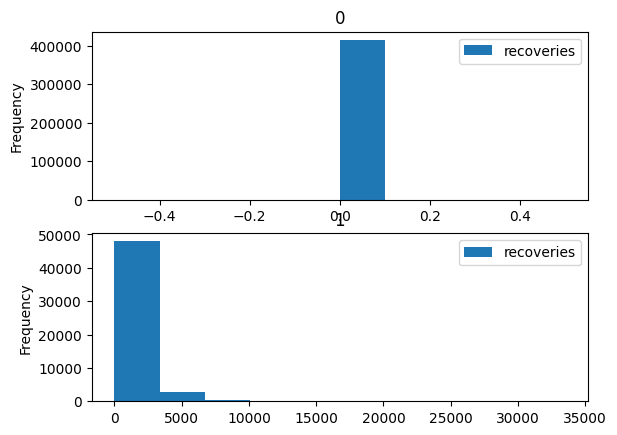

In [143]:
df[['recoveries', 'target']].plot.hist(by = 'target')

array([<Axes: title={'center': '0'}, ylabel='Frequency'>,
       <Axes: title={'center': '1'}, ylabel='Frequency'>], dtype=object)

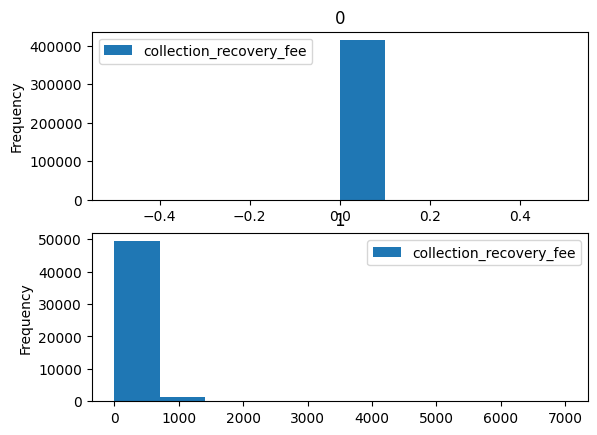

In [144]:
df[['collection_recovery_fee', 'target']].plot.hist(by = 'target')

array([<Axes: title={'center': '0'}, ylabel='Frequency'>,
       <Axes: title={'center': '1'}, ylabel='Frequency'>], dtype=object)

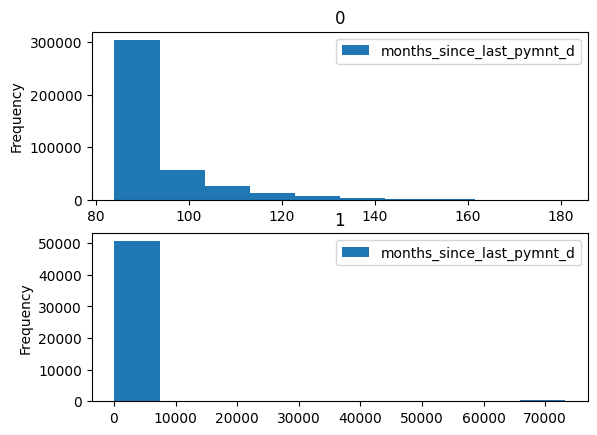

In [145]:
df[['months_since_last_pymnt_d', 'target']].plot.hist(by = 'target')

## Top 50 Features

In [146]:
feature_importance_dict = dict(zip(X.columns, clf.feature_importances_))
sorted_dict = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

print(sorted_dict)

top50 = dict(itertools.islice(sorted_dict.items(), 50)).keys()
top50 = list(top50)

{'recoveries': 0.17521078978602175, 'months_since_last_pymnt_d': 0.1183136924155403, 'collection_recovery_fee': 0.1082783819211945, 'total_rec_prncp': 0.10755940071698476, 'last_pymnt_amnt': 0.07338679178082758, 'total_pymnt_inv': 0.048245484140491963, 'total_pymnt': 0.04638069814915386, 'loan_amnt': 0.033258882991221525, 'installment': 0.03154950248104712, 'out_prncp': 0.031042111428560358, 'out_prncp_inv': 0.029560979292693253, 'funded_amnt_inv': 0.02929289359089998, 'funded_amnt': 0.027059601728964097, 'months_since_next_pymnt_d': 0.021974294591839545, 'months_since_issue_d': 0.016095782573319246, 'months_since_last_credit_pull_d': 0.01498974920057099, 'total_rec_int': 0.013046415787695454, 'total_rec_late_fee': 0.008622021124411926, 'int_rate': 0.007842750433312489, 'term': 0.006833133750900553, 'total_rev_hi_lim': 0.005257828266969001, 'tot_coll_amt': 0.004110817488049643, 'tot_cur_bal': 0.00348321031915897, 'dti': 0.003360094517728346, 'revol_bal': 0.003164007524100354, 'annual_i

In [147]:
X = X[top50].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [148]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"AUC Score: {roc_auc_score(y_test, y_pred)}")

AUC Score: 0.9796599506764829


### Top 50 Features: AUC = 0.9796

### Top 30 Features

In [149]:
feature_importance_dict = dict(zip(X.columns, clf.feature_importances_))
sorted_dict = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

print(sorted_dict)

top30 = dict(itertools.islice(sorted_dict.items(), 30)).keys()
top30 = list(top30)

{'recoveries': 0.15932129794777256, 'collection_recovery_fee': 0.15664723239608905, 'months_since_last_pymnt_d': 0.11796367338112605, 'total_rec_prncp': 0.1086504036062173, 'last_pymnt_amnt': 0.057736729205487454, 'total_pymnt': 0.04897465562133148, 'total_pymnt_inv': 0.039860802856227784, 'funded_amnt_inv': 0.03470723660679585, 'out_prncp': 0.033342022279754815, 'loan_amnt': 0.03180207686233076, 'funded_amnt': 0.03099714674284532, 'installment': 0.028502214702843195, 'months_since_next_pymnt_d': 0.0251552049227857, 'out_prncp_inv': 0.024379233543612523, 'months_since_issue_d': 0.017979690040085497, 'months_since_last_credit_pull_d': 0.015699843330259776, 'total_rec_int': 0.014304681086097998, 'total_rec_late_fee': 0.00768701858554854, 'int_rate': 0.005473137766823543, 'tot_coll_amt': 0.004737256685898834, 'total_rev_hi_lim': 0.004283002484280849, 'term': 0.0030858633206097726, 'revol_bal': 0.002591705972154513, 'tot_cur_bal': 0.0025299012107196533, 'dti': 0.002456217612641844, 'annual

In [150]:
X = X[top30].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [151]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"AUC Score: {roc_auc_score(y_test, y_pred)}")

AUC Score: 0.9807001275065441


### Top 30 **AUC = 0.9807**

Dropping to top 20

In [152]:
feature_importance_dict = dict(zip(X.columns, clf.feature_importances_))
sorted_dict = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

print(sorted_dict)

top20 = dict(itertools.islice(sorted_dict.items(), 20)).keys()
top20 = list(top20)

{'recoveries': 0.2066916513175351, 'collection_recovery_fee': 0.1226785583549854, 'months_since_last_pymnt_d': 0.11907167536599238, 'total_rec_prncp': 0.1149194598295082, 'last_pymnt_amnt': 0.0565975862279712, 'total_pymnt': 0.043552393959564076, 'funded_amnt_inv': 0.04336413871711816, 'total_pymnt_inv': 0.033920240028369054, 'loan_amnt': 0.033350866004102406, 'funded_amnt': 0.03311747074530569, 'installment': 0.03128535621859268, 'months_since_next_pymnt_d': 0.02885845132085822, 'out_prncp': 0.024125429884654864, 'out_prncp_inv': 0.023033317322278844, 'months_since_last_credit_pull_d': 0.01458309578502265, 'months_since_issue_d': 0.013522027929668607, 'total_rec_int': 0.013518937633915682, 'total_rec_late_fee': 0.006969310617095628, 'int_rate': 0.00579621613884455, 'total_rev_hi_lim': 0.005205077705048675, 'term': 0.004061753719473517, 'tot_coll_amt': 0.003941977637489981, 'tot_cur_bal': 0.00289771237467925, 'revol_bal': 0.0028181413084944506, 'dti': 0.0025928259687535158, 'annual_inc

In [153]:
X = X[top20].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [154]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"AUC Score: {roc_auc_score(y_test, y_pred)}")

AUC Score: 0.9822118234847724


### Top 20 **AUC = 0.9822**
### dropping to top 10

In [155]:
feature_importance_dict = dict(zip(X.columns, clf.feature_importances_))
sorted_dict = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

print(sorted_dict)

top10 = dict(itertools.islice(sorted_dict.items(), 10)).keys()
top10 = list(top10)

{'recoveries': 0.19131074516940688, 'collection_recovery_fee': 0.14039622875689484, 'months_since_last_pymnt_d': 0.11770402412343263, 'total_rec_prncp': 0.1168802815777487, 'last_pymnt_amnt': 0.05128493089559084, 'total_pymnt_inv': 0.04463196517244, 'funded_amnt_inv': 0.04217347934220534, 'funded_amnt': 0.04055889716920356, 'total_pymnt': 0.04011250564069017, 'installment': 0.035188363381258754, 'loan_amnt': 0.034499889421893054, 'out_prncp_inv': 0.030536690023228435, 'months_since_next_pymnt_d': 0.029222741246519864, 'out_prncp': 0.025084096658744212, 'months_since_issue_d': 0.015844040493933148, 'months_since_last_credit_pull_d': 0.013342349444004142, 'total_rec_int': 0.01290383934800853, 'int_rate': 0.0068686499492209355, 'total_rec_late_fee': 0.00626134966360236, 'total_rev_hi_lim': 0.005194932521973668}


In [157]:
X = X[top10].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [158]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"AUC Score: {roc_auc_score(y_test, y_pred)}")

AUC Score: 0.9827238800293409


Use XGBoost now to see if AUC improves

In [159]:
clf = xgboost.XGBClassifier(objective='binary:logistic')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"AUC Score: {roc_auc_score(y_test, y_pred)}")

AUC Score: 0.9836585084111218


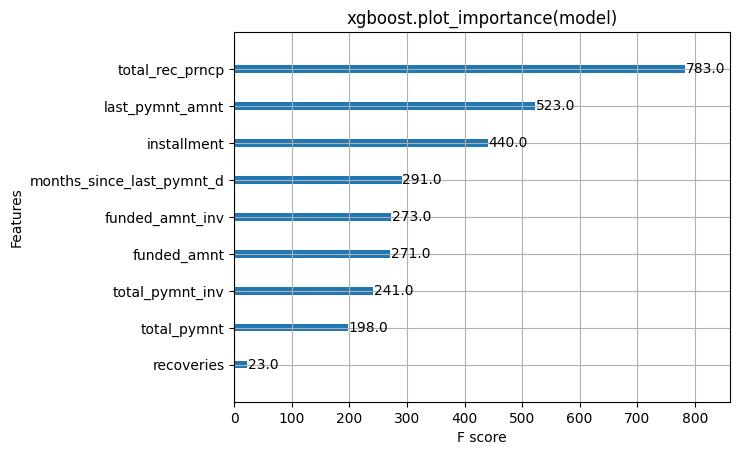

In [164]:
xgboost.plot_importance(clf)
pl.title("xgboost.plot_importance(model)")
pl.show()

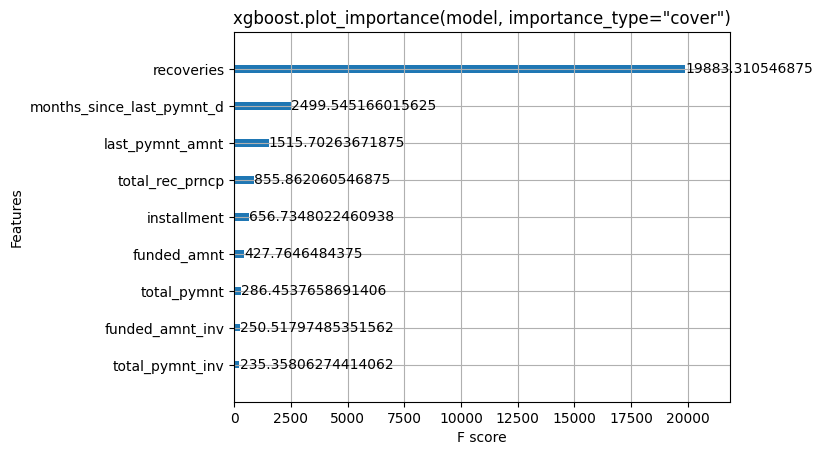

In [166]:
xgboost.plot_importance(clf, importance_type="cover")
pl.title('xgboost.plot_importance(model, importance_type="cover")')
pl.show()

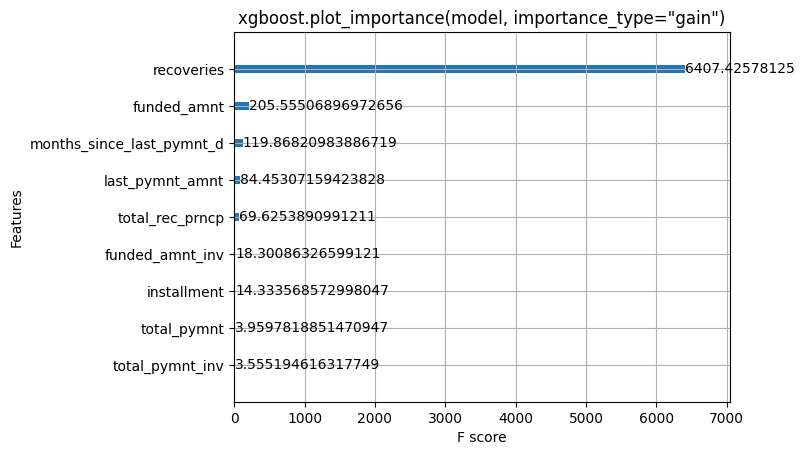

In [165]:
xgboost.plot_importance(clf, importance_type="gain")
pl.title('xgboost.plot_importance(model, importance_type="gain")')
pl.show()

# SHAP

In [173]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 4.2 MB/s eta 0:00:00


In [174]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [175]:
shap.initjs()

In [170]:
X_shap = X[:100]

In [176]:

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_shap)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


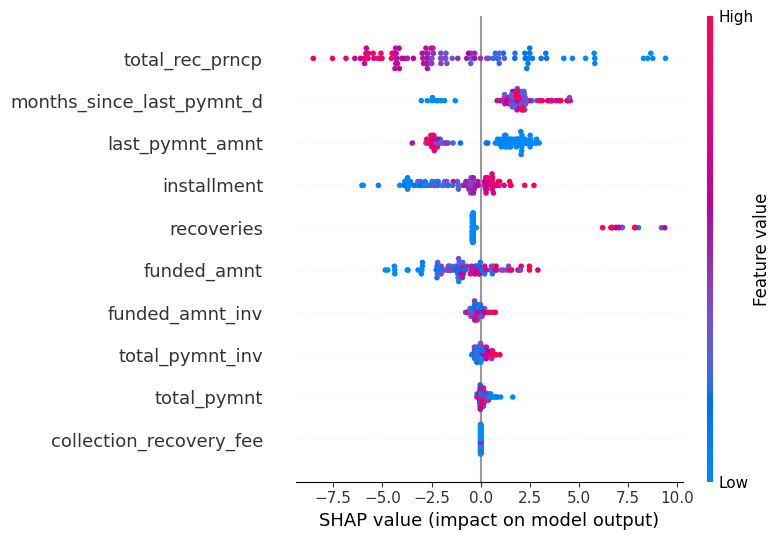

In [177]:
shap.summary_plot(shap_values, X_shap)